# Health Survey Data Analysis

### By: Liliana Emfinger

## Executive Summary

This is a data set of state-based "Behavioral Risk Factor Surveillance System (BRFSS)" from the Centers for Disease Control and Prevention (CDC) in 2020. It is from a cross-sectional telephone standardized questionnaire. 
The data used for this study is from columns `PHYSHLTH` and `RENTHOM1`.


Goals 
1. How many days of poor health did New Yorkers typically have in 2020-2021?, 
2. How Does physical health Differ Based on whether participant rented or owned a home?, 
3. Is the Difference Statistically Significant? We look at the null and alternative hypothesis 
    - Null Hypothesis(h0):There is no difference between average days sick (physhlth) for renters and owners.
    - Alternative Hypothesis(h1):There is a difference between average days sick (physhlth) for renters and owners. 
4. Next Steps: Looking at other features of the data for future exploration.

Project found that typically New Yorkers had around 2.9 to 3.2 days of poor health in 2020-2021. From what the data shows if you Own a home you are less likely to spend more than 6 days in poor health. The majority of participants that owned a home spent 0 days in the last 30 days in poor health. This is showing that people who own homes have fewer days of bad health than those who rent. The p-value is signicantly smaller than the alpha, this means that we will REJECT the null hypothesis and accept the alternative hypothesis.

## The Data

This project uses health data from the CDC Behavioral Risk Factor Surveillance System (BRFSS). This project uses a subset of the data that represents survey responses from the 2020-2021 survey in the state of New York.

The columns this project analyzes data in specifically theese columns `PHYSHLTH` and  `RENTHOM1`.
- `PHYSHLTH` represents participants answer to the survey question "Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?" 
    - There are multiple answer values given. Please see below for the key. 

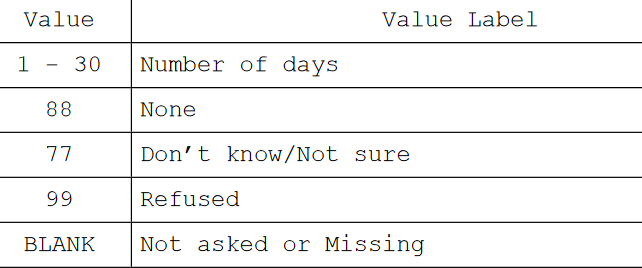

-  `RENTHOM1` represents participants answer to the survey question "Do you own or rent your home?" 
    - There are multiple answer values given. Please see below for the key. 

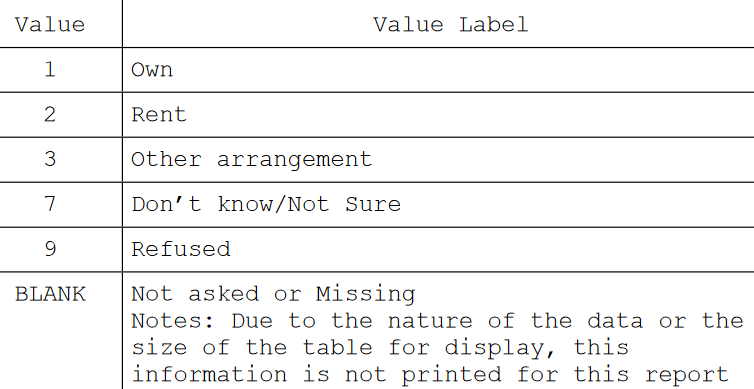

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import t
import seaborn as sns


file_path = "https://raw.githubusercontent.com/learn-co-curriculum/da-phase3-project-enterprise/main/brfss_ny.csv"
df = pd.read_csv(file_path)

## Data Preparation

In [2]:
#cleaning up columns that are not needed
df.drop(df.columns.difference(['PHYSHLTH', 'RENTHOM1']), 1, inplace=True)

/tmp/ipykernel_153/2553161008.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.columns.difference(['PHYSHLTH', 'RENTHOM1']), 1, inplace=True)


In [3]:
#checking first 5 rows 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14769 entries, 0 to 14768
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PHYSHLTH  14769 non-null  float64
 1   RENTHOM1  14769 non-null  float64
dtypes: float64(2)
memory usage: 230.9 KB


In [4]:
#drop 77 and 99 
#where 77 means dont know not sure
#99 means refused

#dropping this because it effects the data but actually tells us nothing
df.drop(df.index[df['PHYSHLTH'] == 77], inplace=True)

df.drop(df.index[df['PHYSHLTH'] == 99], inplace=True)

In [5]:
# checking row values and length of column
df['PHYSHLTH'].value_counts()

88.0    10565
30.0      768
2.0       597
1.0       410
5.0       367
3.0       361
10.0      231
7.0       209
15.0      194
4.0       163
20.0      147
14.0      144
25.0       55
6.0        47
8.0        45
21.0       26
28.0       22
12.0       22
9.0        11
29.0        8
13.0        7
18.0        6
17.0        6
16.0        6
24.0        5
27.0        5
11.0        4
26.0        3
23.0        3
19.0        2
22.0        1
Name: PHYSHLTH, dtype: int64

In [6]:
# replacing 88 with 0 because 88 is none 
df.loc[df["PHYSHLTH"] == 88, "PHYSHLTH"] = 0

In [7]:
#checking column values looks like replacing worked
df['PHYSHLTH'].value_counts()

0.0     10565
30.0      768
2.0       597
1.0       410
5.0       367
3.0       361
10.0      231
7.0       209
15.0      194
4.0       163
20.0      147
14.0      144
25.0       55
6.0        47
8.0        45
21.0       26
28.0       22
12.0       22
9.0        11
29.0        8
13.0        7
18.0        6
17.0        6
16.0        6
24.0        5
27.0        5
11.0        4
26.0        3
23.0        3
19.0        2
22.0        1
Name: PHYSHLTH, dtype: int64

In [8]:
#checking to see if any NULL data
df['PHYSHLTH'].isna().sum()

0

### RENTHOM1 Data Prep

In [9]:
#looking at RENTHOM1 to possibly see other values and to check the length
df['RENTHOM1'].value_counts()

1.0    8453
2.0    5206
3.0     585
9.0     141
7.0      55
Name: RENTHOM1, dtype: int64

In [10]:
# Dropping values 3, 7, 9, and BLANK 
#3 is other arrangement
# 7 is dont know/ not sure
# 9 is refused
# BLank is not asked or missing
df.drop(df.index[df['RENTHOM1'] == 3 ], inplace=True)
df.drop(df.index[df['RENTHOM1'] == 7 ], inplace=True)
df.drop(df.index[df['RENTHOM1'] == 9 ], inplace=True)
df.drop(df.index[df['RENTHOM1'] == 'BLANK' ], inplace=True)

In [11]:
#checking length to see if rows were dropped
df['RENTHOM1'].value_counts()

1.0    8453
2.0    5206
Name: RENTHOM1, dtype: int64

In [12]:
#checking to see if any NULL data
df['RENTHOM1'].isna().sum()

0

## Confidence Interval for Mean of `PHYSHLTH`

In [13]:
#taking mean of PHYSHLTH
df['PHYSHLTH'].describe()

count    13659.000000
mean         3.064646
std          7.581325
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

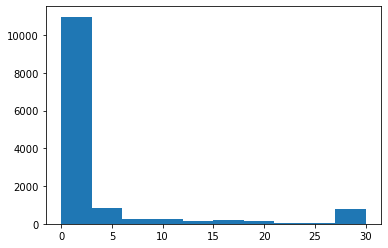

In [14]:
#Looking at the data with a plot 
plt.hist(df['PHYSHLTH']);

In [15]:
#Confidence Interval
data = df['PHYSHLTH']
mean = data.mean() 
std = data.std() 
dof = len(data)-1 
confidence = 0.95
se = std/np.sqrt(len(data))

In [16]:
stats.t.interval(alpha = confidence, loc = mean, scale = se, df = dof)

(2.9374942974789575, 3.1917977443981926)

### Interpretation of confidence interval
We are 95% confident that the mean falls with in this range of 2.94 and 3.20

##### So How many days of poor health did New Yorkers typically have in 2020-2021? 
The answer is typically around 2.9 to 3.2 days. 

## Differences in `PHYSHLTH` Based on `RENTHOM1`

### How Does `PHYSHLTH` Differ Based on `RENTHOM1`?

We split the data in `RENTHOM1` between participants who own representing 1 and participants who rent representing 2 
Below we created two new dataframes one representing those who rent(2)
and those who own(1)

In [17]:
#create two new data frames spliting 'RENTHOM1' and filtering each with colomn ['PHYSHLTH']
rent = df.loc[df['RENTHOM1'] == 2]['PHYSHLTH']
own = df.loc[df['RENTHOM1']== 1 ]['PHYSHLTH']

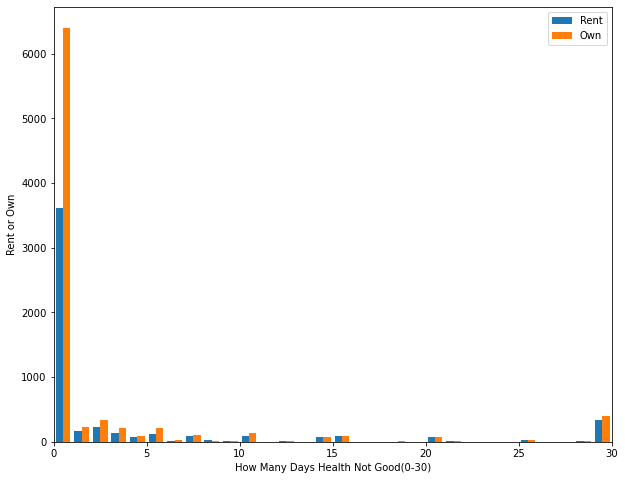

In [18]:
#creating a figure
fig, ax = plt.subplots(figsize = (10,8))

x =[rent,own]
#creating a histogram where x is rent and own 
ax.hist(x, label=["Rent","Own"], bins = 30)
#setting labels on plot
ax. set(xlabel='How Many Days Health Not Good(0-30)', ylabel='Rent or Own') 
#setting range of x ticks
ax.set_xticks(np.arange(0, 30 +1, 5))
plt.xlim(0, 30)
#adding a legend to tell which color represents either rent or own
ax.legend();

 I like this but its too confusing so I made this below to actually plot two tables 

## Ploting two tables for `RENTHOM1` for clarity
### Separating RENT and OWN

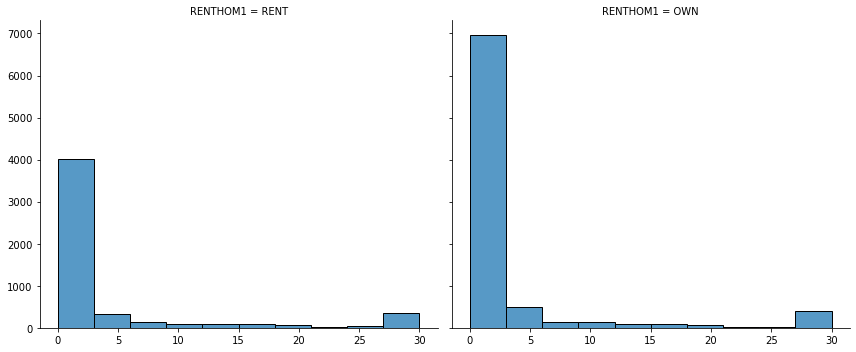

In [19]:
#separating from rent and own 
#own representing 1 
#rent representing 2 
df_rent_own = df.loc[(df['RENTHOM1']== 1)| (df['RENTHOM1'] == 2)]

#in this new df called df_rent_own go to this column and where it is equal to 1 say "OWN" else say 'RENT'(HENCE 2)
df_rent_own['RENTHOM1'] = np.where(df_rent_own['RENTHOM1']==1, 'OWN','RENT')

#PLOT
g = sns.FacetGrid(df_rent_own, col = "RENTHOM1", height=5, aspect=1.2)

g.map_dataframe(sns.histplot, x="PHYSHLTH", bins= 10)
plt.show()

From what the table shows if you Own a home you are less likely to spend more than 6 days in poor health. The majority of participants that owned a home spent 0 days in the last 30 days in poor health. This is showing that people who own homes have fewer days of bad health than those who rent. 

## Is the Difference Statistically Significant?

**Null Hypothesis**(h0): There is no relationship between A and B.
For this study: There is no difference between average days sick (physhlth) for renters and owners. We're set out to disprove this hypothesis. 

**Alternative Hypothesis**(h1): There is a difference between A and B.
For this study: There is a difference between average days sick (physhlth) for renters and owners. This is the point of the study. 

This is a two-tailed test because there is no claim is made that the difference observed is greater than or lesser than the true population means. The two-sample t-test is used to determine if two population means are equal. A two-tailed test is appropriate if you want to determine if there is any difference between the groups you are comparing.

In [20]:
import statistics

#difference of variance 
print(statistics.variance(rent))
print(statistics.variance(own))

68.11328600746275
50.53618574888828


Welches T-test will be needed since variances are different. 

In [21]:
#T-Test
#rent = df.loc[df['RENTHOM1'] == 2]['PHYSHLTH']
#own = df.loc[df['RENTHOM1']== 1 ]['PHYSHLTH']
#equal_var=>If False, perform Welch's t-test, which does not assume equal population variance.
t,p = stats.ttest_ind(rent,own, equal_var=False)
print("ttest_ind: t = %g  p-value = %g" %(t, p))

ttest_ind: t = 7.38832  p-value = 1.60846e-13


In [22]:
.000000000000016

1.6e-14

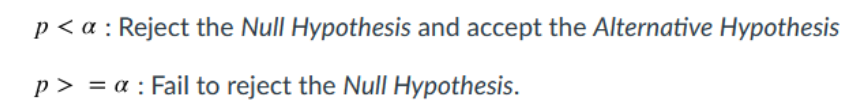

If the P-value is smaller than the significance level (a), we reject the null hypothesis (H0). if p-value is bigger than the significance level(a), than we reject the alternative hypothesis (h1). 

The p-value is .000000000000016
and the significance level(a) is .05

Looks like the p-value is signicantly smaller than the alpha (significance level). So this means that we will REJECT the null hypothesis and accept the alternative hypothesis. The alternative hypothesis is that there is a difference between average days sick (physhlth) for renters and owners. So basically this is saying that "There is a 0% chance of obtaining the results I'm seeing when the null hypothesis is true."

## Next Steps

Given the above information, what feature of the dataset would you propose investigating next?

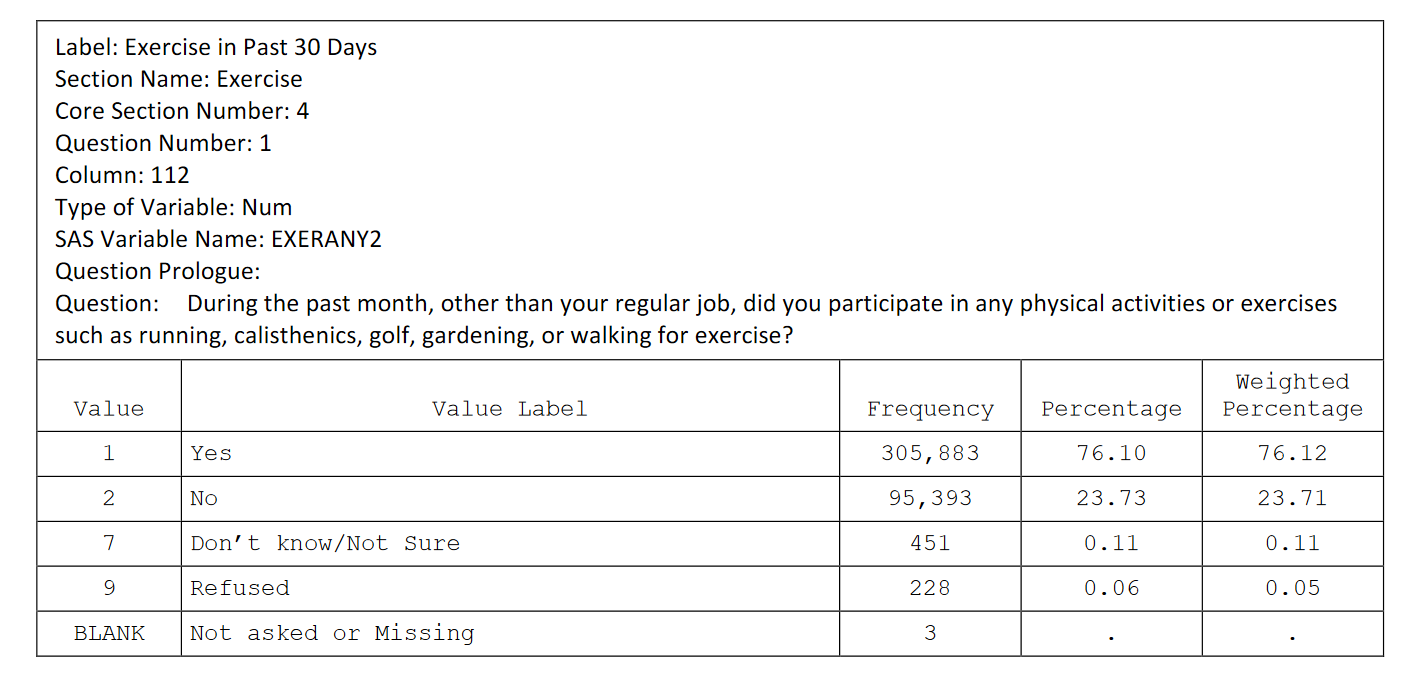

I would like to propose we explore if `PHYSHLTH` (which is "how long in the past 30 days a participant did not feel well") and `EXERANY2` (which is "During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?") to see if there is a correlation between how many days they felt unwell and if they exercise. 

I would actually also like to see how `EXERANY2` and `MENTHLTH`("Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?"). I would like to see the correlation between exercise and mental health. 

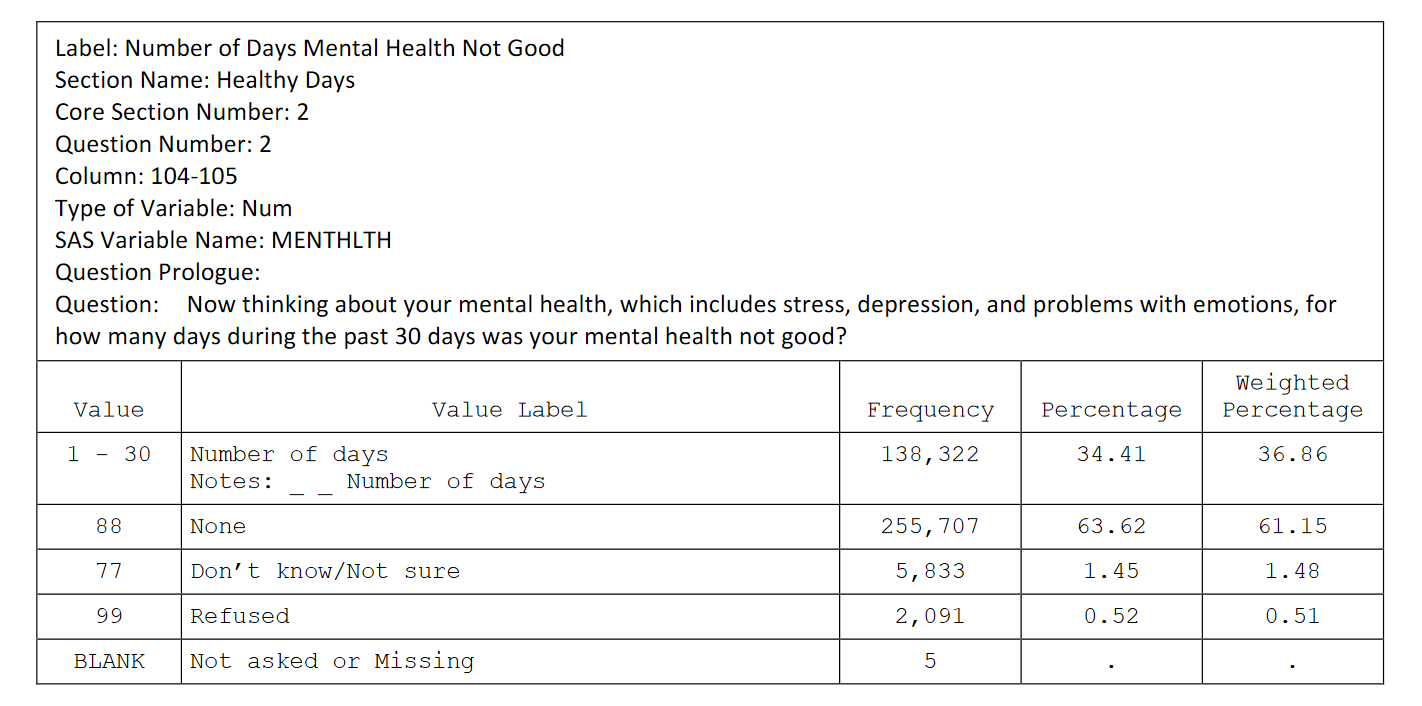